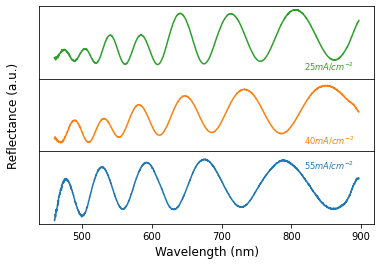

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shutil import copyfile
from sklearn.preprocessing import StandardScaler
from matplotlib import rc

# spectra text files corresponding to each of the three pore sizes
files = ["../TrainingData//25mAcm^-2.txt"
         ,"../TrainingData//40mAcm^-2.txt"
         ,"../TrainingData//55mAcm^-2.txt"]

# offset each plot
offsets = [0, 3.5, 7]

fig = plt.figure()

# create 3 panes in the plot with shared x and y axis
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

colours = ['tab:green', 'tab:orange', 'tab:blue']
    
i=0
for FileName, ax, colour in zip(files, axs, colours):
    data=np.loadtxt(FileName)
    
    # use wavelength range from ~460nm to ~900nm
    data = data[1024:2867,:]

    # standardize data for easier comparison between spectra
    data[:,1] = StandardScaler().fit_transform(data)[:,1]

    axs[i].plot(data[:,0], data[:,1], c=colour)
    
    # set y axis label for central panel only
    if i==1:
        ax.set_ylabel('Reflectance (a.u.)\n', fontsize = 'large')
    i+=1
    
    ax.tick_params(axis='y', left = False, labelleft = False)

# set text labels
ax.set_xlabel('Wavelength (nm)', fontsize = 'large')
ax.text(818, 7.0, r'$25 mA/cm^{-2}$', fontsize = 'small', color = 'tab:green')
ax.text(818, 2.6, r'$40 mA/cm^{-2}$', fontsize = 'small', color = 'tab:orange')
ax.text(818, 1.1, r'$55 mA/cm^{-2}$', fontsize = 'small', color = 'tab:blue')

plt.savefig("../Figures/RawSpectraPlotPanes.png", dpi=200, bbox_inches='tight')